# Phising Website Detection by Machine Learning

### 1.Objective:

###### A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models on the dataset to predict phishing websites. Both phishing, Legitimate and suspicious URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measured.

### 2.Loading Data

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data
df=pd.read_csv('C://Users//Anjali Babu//Downloads//websitephishing.csv')
df.head(5)

,id,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,1,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0
1,2,-1,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0
2,3,1,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0
3,4,1,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,5,-1,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,1.0


### 3.Familiarizing with Data

In [3]:
#checking the shape of the dataset
df.shape

(1354, 11)

In [4]:
#listing the features of the dataset
df.columns

Index(['id', 'SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL',
       'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain',
       'having_IP_Address', 'Result'],
      dtype='object')

In [5]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1354 non-null   int64  
 1   SFH                1354 non-null   object 
 2   popUpWidnow        1353 non-null   float64
 3   SSLfinal_State     1353 non-null   float64
 4   Request_URL        1353 non-null   float64
 5   URL_of_Anchor      1353 non-null   float64
 6   web_traffic        1353 non-null   float64
 7   URL_Length         1353 non-null   float64
 8   age_of_domain      1353 non-null   float64
 9   having_IP_Address  1353 non-null   float64
 10  Result             1353 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 116.5+ KB


### 4.Visualizing the Data

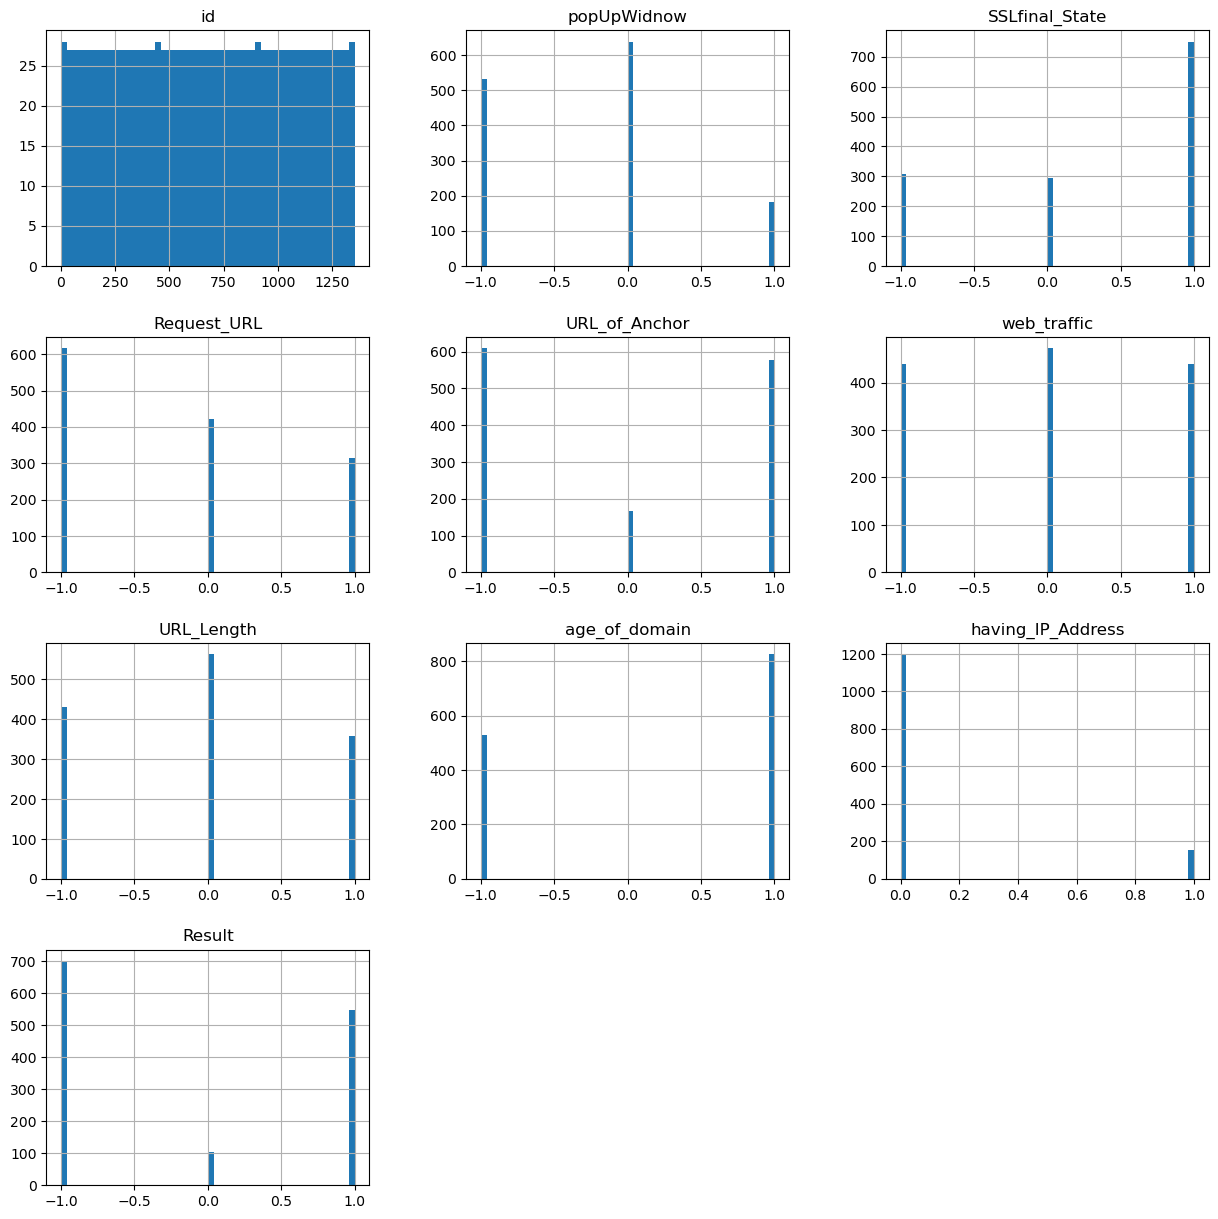

In [6]:
#plotting the data distribution
df.hist(bins=50,figsize=(15,15))
plt.show()

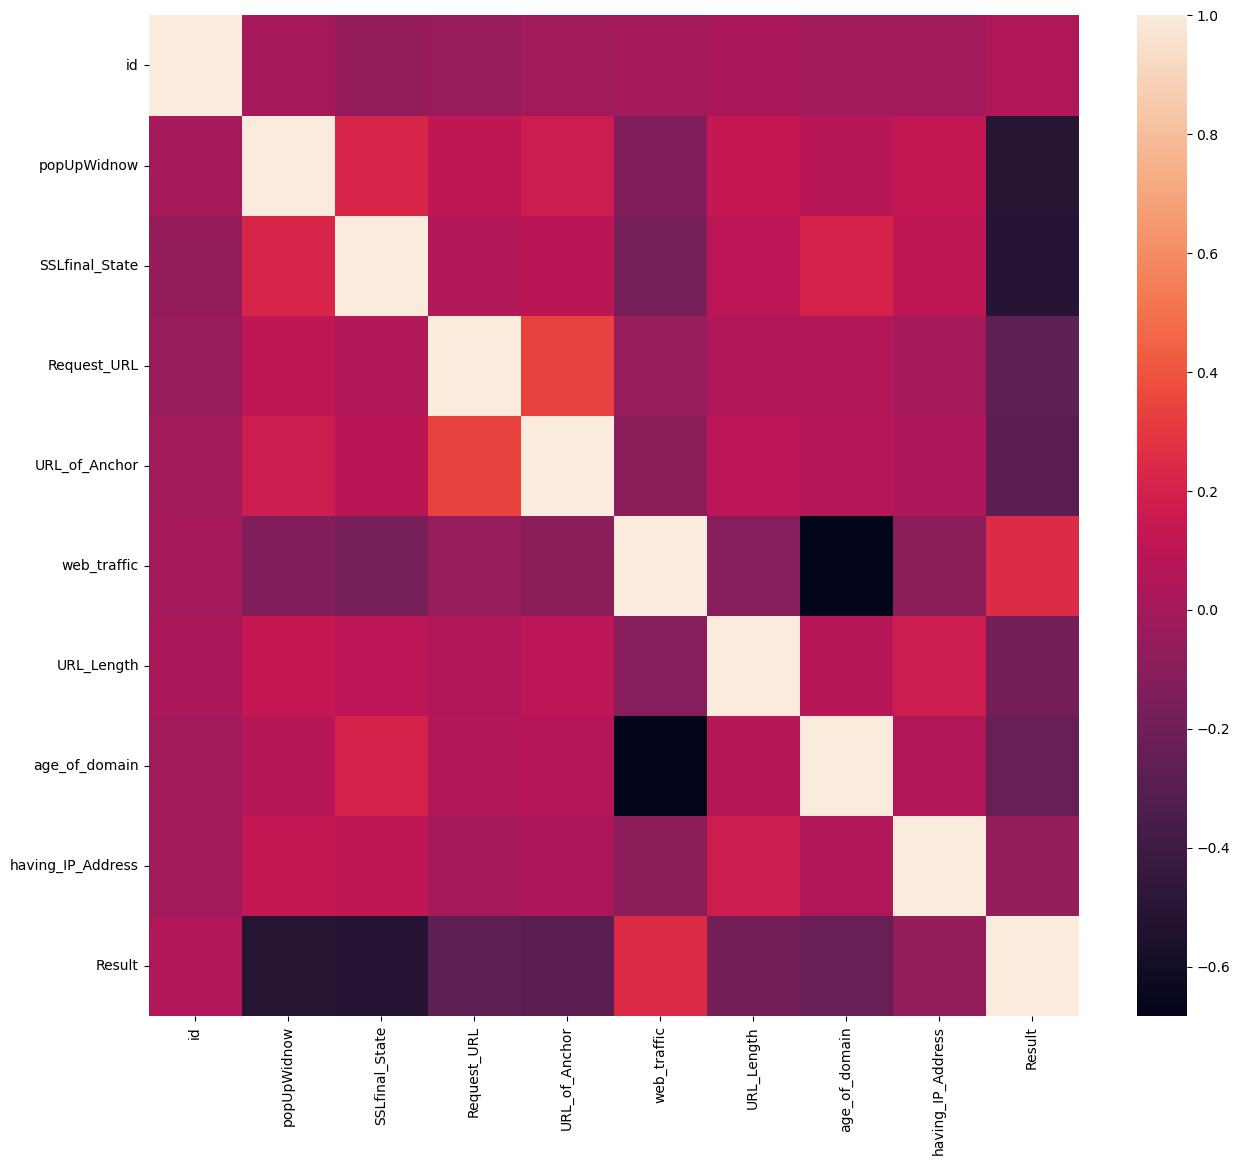

In [7]:
#correlation heat map
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

### 5.Data Processing and EDA

In [8]:
df.describe()

,id,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1354.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,677.500000,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,391.010443,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,339.250000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,677.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1015.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1354.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### The above obtained result shows that all of the data is made of 1's,0's and -1's except the id column, the id column doesn't have any significance to the machine learning model training.So dropping 'id' column from the dataset

In [9]:
#dropping the id column
df.drop('id',inplace=True,axis=1)

In [10]:
#checking the data for null or missing values
df.isnull().sum()

SFH                  0
popUpWidnow          1
SSLfinal_State       1
Request_URL          1
URL_of_Anchor        1
web_traffic          1
URL_Length           1
age_of_domain        1
having_IP_Address    1
Result               1
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SFH                1354 non-null   object 
 1   popUpWidnow        1353 non-null   float64
 2   SSLfinal_State     1353 non-null   float64
 3   Request_URL        1353 non-null   float64
 4   URL_of_Anchor      1353 non-null   float64
 5   web_traffic        1353 non-null   float64
 6   URL_Length         1353 non-null   float64
 7   age_of_domain      1353 non-null   float64
 8   having_IP_Address  1353 non-null   float64
 9   Result             1353 non-null   float64
dtypes: float64(9), object(1)
memory usage: 105.9+ KB


In [12]:
df.fillna(0,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SFH                1354 non-null   object 
 1   popUpWidnow        1354 non-null   float64
 2   SSLfinal_State     1354 non-null   float64
 3   Request_URL        1354 non-null   float64
 4   URL_of_Anchor      1354 non-null   float64
 5   web_traffic        1354 non-null   float64
 6   URL_Length         1354 non-null   float64
 7   age_of_domain      1354 non-null   float64
 8   having_IP_Address  1354 non-null   float64
 9   Result             1354 non-null   float64
dtypes: float64(9), object(1)
memory usage: 105.9+ KB


### 6.Splitting the Data

In [14]:
#Seperating and assigning features and target columns to X and Y
y=df['Result']
x=df.drop('Result',axis=1)
x.shape,y.shape

((1354, 9), (1354,))

In [15]:
x=x.apply(pd.to_numeric,errors='coerce')
y=y.apply(pd.to_numeric,errors='coerce')

In [16]:
x.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [17]:
#Splitting the data into train and test slpit:80:20 split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
x_train.shape,x_test.shape

((1083, 9), (271, 9))

In [18]:
y_train.shape,y_test.shape

((1083,), (271,))

### 7.Machine Leraning Models and Training

In [19]:
#importing packages
from sklearn.metrics import accuracy_score

In [20]:
#Creating holders to store the model performance results
ML_Model=[]
acc_train=[]
acc_test=[]
def storeResult(model,a,b):
    ML_Model.append(model)
    acc_train.append(round(a,3))
    acc_test.append(round(b,3))

### 7.1 Decision Tree Classifier

In [21]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier

#instantiate the model
tree=DecisionTreeClassifier()
#fit the model
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
#predicting the target value from the model for the samples
y_test_tree=tree.predict(x_test)
y_train_tree=tree.predict(x_train)

#### Performance Evaluation

In [23]:
#computing the accuracy of the model performance
acc_train_tree=accuracy_score(y_train,y_train_tree)
acc_test_tree=accuracy_score(y_test,y_test_tree)
print("Decision Tree Accuracy on training Data:",(acc_train_tree))
print("Decision Tree Accuracy on test Data:",(acc_test_tree))

Decision Tree Accuracy on training Data: 0.9621421975992613
Decision Tree Accuracy on test Data: 0.8782287822878229


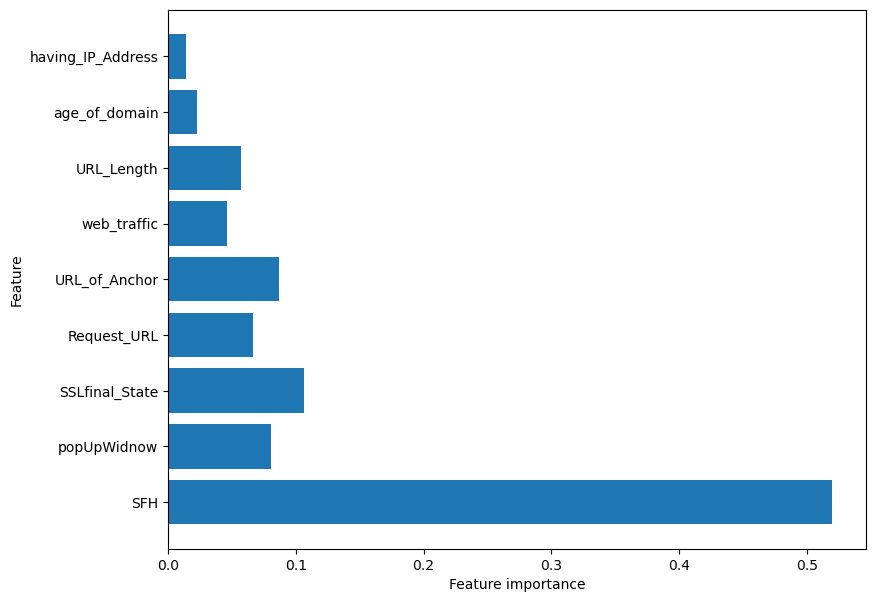

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### Storing the Result

In [25]:
#storing the results. The below mentioned order of parameter passing is important
#Caution: Execute only once to avoid duplication.
storeResult('Decision Tree',acc_train_tree,acc_test_tree)

### 7.2 Random Forest Classifier

In [26]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
forest=RandomForestClassifier()
#fit the model
forest.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
#predicting the target value from the model for the samples
y_test_forest=forest.predict(x_test)
y_train_forest=forest.predict(x_train)

#### Performance Evaluation

In [28]:
#computing the accuracy of the model performance
acc_train_forest=accuracy_score(y_train,y_train_forest)
acc_test_forest=accuracy_score(y_test,y_test_forest)
print("Random Forest Accuracy on training Data:",(acc_train_forest))
print("Random Forest Accuracy on testing Data:",(acc_test_forest))

Random Forest Accuracy on training Data: 0.9621421975992613
Random Forest Accuracy on testing Data: 0.9040590405904059


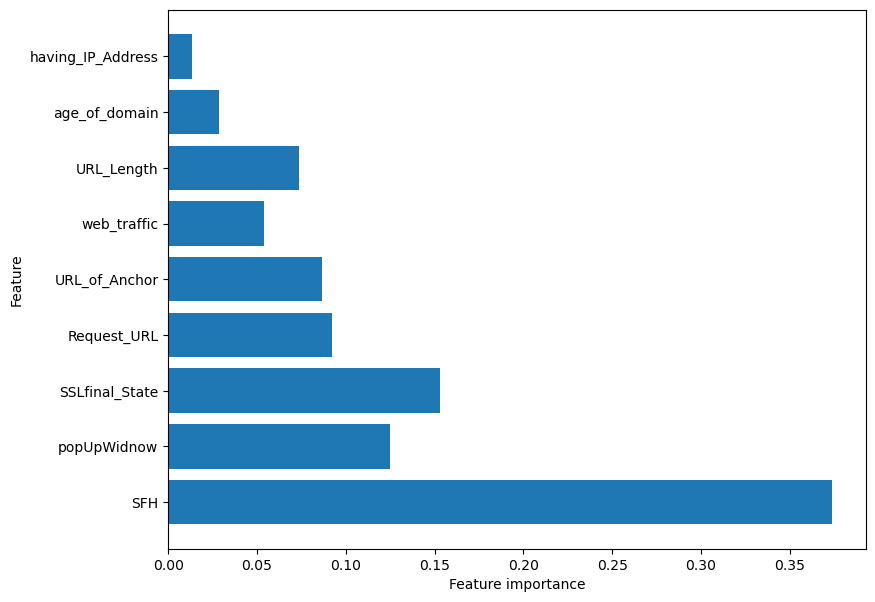

In [29]:
#checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### Storing the Result

In [30]:
#storing the result
storeResult('Random Forest',acc_train_forest,acc_test_forest)

### 7.3 Support Vector Machine

In [31]:
#Support vector machine model
from sklearn.svm import SVC

#instantiate the model
svm=SVC(kernel='linear',C=1.0,random_state=12)
#fit the model
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=12)

In [32]:
#predicting the target value from the model for the samples
y_test_svm=svm.predict(x_test)
y_train_svm=svm.predict(x_train)

#### Performance Evaluation

In [33]:
#computing the accuracy of the model performance
acc_train_svm=accuracy_score(y_train,y_train_svm)
acc_test_svm=accuracy_score(y_test,y_test_svm)
print("SVM Accuracy on training Data:",(acc_train_svm))
print("SVM Accuracy on testing Data:",(acc_test_svm))

SVM Accuracy on training Data: 0.850415512465374
SVM Accuracy on testing Data: 0.8154981549815498


In [34]:
#Storing the Results
storeResult('SVM',acc_train_svm,acc_test_svm)

### 7.4 Logistic Regression

In [35]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression

#initiate the model
logreg=LogisticRegression()
#fit the model
logreg.fit(x_train,y_train)

LogisticRegression()

In [36]:
#predicting the target value from the model for the samples
y_test_logreg=logreg.predict(x_test)
y_train_logreg=logreg.predict(x_train)

#### Performance Evaluation

In [37]:
#computing the accuracy of the model performance
acc_train_logreg=accuracy_score(y_train,y_train_logreg)
acc_test_logreg=accuracy_score(y_test,y_test_logreg)
print("Logistic Regression on training Data:",(acc_train_logreg))
print("Logistic Regression on test Data:",(acc_test_logreg))

Logistic Regression on training Data: 0.8384118190212373
Logistic Regression on test Data: 0.8007380073800738


#### Storing the Result

In [38]:
#storing the result
storeResult('Logistic Regression',acc_train_logreg,acc_test_logreg)

### 7.5 K Nearest Neighbour

In [39]:
#K Nearest Neighbour model
from sklearn.neighbors import KNeighborsClassifier

#initiate the model
knn=KNeighborsClassifier(n_neighbors=3)
#fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
#predicting the target value from the model for the samples
y_test_knn=knn.predict(x_test)
y_train_knn=knn.predict(x_train)

C:\Users\Anjali Babu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anjali Babu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

#### Performance Evaluation

In [41]:
#computing the accuracy of the model performance
acc_train_knn=accuracy_score(y_train,y_train_knn)
acc_test_knn=accuracy_score(y_test,y_test_knn)
print("KNN Accuracy on training Data:",(acc_train_knn))
print("KNN Accuracy on testing Data:",(acc_test_knn))

KNN Accuracy on training Data: 0.9307479224376731
KNN Accuracy on testing Data: 0.8819188191881919


#### Storing the Result

In [42]:
storeResult('KNN',acc_train_knn,acc_test_knn)

### 8.Comparison of models

In [43]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.962,0.878
1,Random Forest,0.962,0.904
2,SVM,0.850,0.815
3,Logistic Regression,0.838,0.801
4,KNN,0.931,0.882


In [44]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest,0.962,0.904
4,KNN,0.931,0.882
0,Decision Tree,0.962,0.878
2,SVM,0.850,0.815
3,Logistic Regression,0.838,0.801
